# Lab 5 Applied Machine Learning
Objective
In this lab session you will

* explore some programming concepts in Python, SciKitLearn, and Numpy to implement several statistical / Bayesian classifiers and compare them against each other and with one provided in SciKitLearn,
* get acquainted with another version of the MNIST dataset, and 
* explore the effects of specific phenomena in the data on the classification results, also depending on the choice of discrete vs continuous implementation of the models.  

## Background and Tools

A rather intuitive and greedy (supervised) method to classification is the (k-)Nearest-Neighbour classification. This can be based on a brute force method, in which the entire (training) data set is searched for the (k) example(s) that is (are) closest to the sample one wants to classify. Similar to this is the Nearest-Centroid-Classifier (NCC) that minimises the distance between the sample to the centroids (means) of the clusters formed in feature space by the examples belonging to the different classes. In the supervised case, it is quite obvious how to find the centroid for a class - it is simply the "point" derived by computing the mean for each attribute value for the examples belonging to the given class.

Slightly more sophisticated is then to go from applying the distance to the class-centroids in a direct comparison to interpreting them in terms of a probability distribution (density function). This can be done with (Naive) Bayesian Classifiers (NBCs), as discussed in the lecture. You will for this lab session implement several variants of the mentioned classifiers, and you will do that on both the extremely simplified version of the MNIST dataset provided in SciKitLearn (datasets.digits), and on a slightly more elaborate but still preprocessed version of the MNIST data provided together with a bit of a code skeleton to read in and visualise the data HERE.

[If you are interested and willing to do a bit more file I/O handling, another, even larger and more realistic, version of the MNIST data set can be found on Yann LeCun's site (http://yann.lecun.com/exdb/mnist/).]

## Your task
You will implement an NCC, a discrete (count-based) NBC, and a Gaussian NBC and run and compare them on different versions of the data set(s) explained in point 2 as follows:

1. Classifiers you should implement (and make sure that they work with the data sets indicated)

    1. Make use of the provided Gaussian NB Classifier (sklearn.naive_bayes GaussianNB) for all data sets as a comparison. It is already implemented in the handout for the MNIST_Light set (see below).

    2. Implement your own Nearest Centroid Classifier (NCC): The NCC fit method should simply compute the mean values over the attribute values of the examples for each class. Prediction is then done by finding the argmin over the distances from the class centroids for each sample. This classifier should be run on all three variants of data sets, see below.

    3. Implement a Naive Bayesian Classifier (NBC) based on discrete (statistical) values (i.e., counts of examples falling into the different classes and attribute value groups) both for the priors and for the conditional probabilities. Run this on the two SciKitLearn digits data sets. It should also work with the (non-normalised) MNIST_Light set, but it will probably take a (very long) while and not give anything interesting really...

    4. Implement your own Gaussian Naive Bayesian Classifier (GNB) (assume priors for the classes based on counts and Gaussian distributions for the conditional probabilities) and make sure it works for all three data sets. You will most likely encounter problems due to the edge pixels having value 0.0 in practically ALL images in ALL data sets. A workaround is to add an epsilon to the variance. Why is that still working?


In [1]:
from google.colab import drive
drive.mount('/gdrive')
path = '/gdrive/My Drive/ML'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


# Data sets
Load and plot the three different data sets 

### SciKitLearn digits

<Figure size 432x288 with 0 Axes>

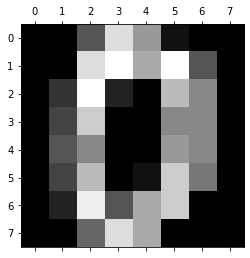

In [2]:
%matplotlib inline
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt 
import numpy as np

digits =  load_digits()
#print(digits_1.data.shape)
plt.gray() 
plt.matshow(digits.images[0])
plt.show() 

split = int(len(digits.data)*0.7)

data_1_train = digits.data[:split]
data_1_test = digits.data[split+1:]
labels_1_train = digits.target[:split]
labels_1_test = digits.target[split + 1:]

### SciKitLearn digits summarised: 
reduce the data set to only contain three values for the attributes, e.g., 0 for 'dark', 1 for 'grey' and 2 for 'light', with dark, grey and light corresponding to the values suggested in lab 2 (decision trees). Split again into 70% training and 30% test data.
Run all four classifiers on this set and compare the results. Why are they so different from those for the original data in particular for the NBC? Why do they decrease in accuracy for the GNB?

(1257, 64)
(8, 8)


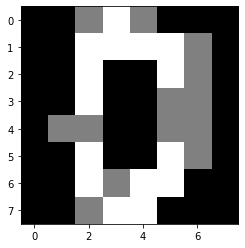

In [3]:
#SciKitLearn digits, white, gray, black

data_2_train = []
data_2_test = []
for im in data_1_train:
    new_im = []
    for pix in im:
        if pix < 5:
            new_im.append(0)
        elif pix < 10:
            new_im.append(1)
        else:
            new_im.append(2)
    data_2_train.append(new_im)
    
for im in data_1_test:
    new_im = []
    for pix in im:
        if pix < 5:
            new_im.append(0)
        elif pix < 10:
            new_im.append(1)
        else:
            new_im.append(2)
    data_2_test.append(new_im)

print(np.shape(data_2_train))
im = np.reshape(data_2_train[0],(8,8))
print(np.shape(im))

plt.gray() 
plt.imshow(im) 
plt.show() 

### MNIST data

In [4]:
from Handout_NaiveBayes import MNIST

mnist = MNIST.MNISTData('MNIST_Light/*/*.png')

data_mnist_train, data_mnist_test, labels_mnist_train, labels_mnist_test = mnist.get_data()

mnist.visualize_random()

ValueError: Found input variables with inconsistent numbers of samples: [0, 5000]

1.1 
Make use of the provided Gaussian NB Classifier (sklearn.naive_bayes GaussianNB) for all data sets as a comparison. It is already implemented in the handout for the MNIST_Light set (see below).

In [7]:
train_features, test_features, train_labels, test_labels = data_1_train, data_1_test, labels_1_train, labels_1_test 
#train_features, test_features, train_labels, test_labels  = data_2_train, data_2_test, labels_2_train, labels_2_test
#train_features, test_features, train_labels, test_labels  = data_mnist_train, data_mnist_test, labels_mnist_train, labels_mnist_test 

In [8]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB


gnb = GaussianNB()
gnb.fit(train_features, train_labels)
y_pred = gnb.predict(test_features)

print("Classification report SKLearn GNB:\n%s\n"
    % (metrics.classification_report(test_labels, y_pred)))
print("Confusion matrix SKLearn GNB:\n%s" % metrics.confusion_matrix(test_labels, y_pred))

#mnist.visualize_wrong_class(y_pred, 8)

Classification report SKLearn GNB:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        53
           1       0.65      0.79      0.71        53
           2       0.98      0.81      0.89        53
           3       0.92      0.64      0.76        53
           4       1.00      0.86      0.92        56
           5       0.83      0.93      0.87        56
           6       0.96      0.98      0.97        54
           7       0.73      0.83      0.78        54
           8       0.59      0.71      0.64        52
           9       0.82      0.73      0.77        55

    accuracy                           0.83       539
   macro avg       0.84      0.82      0.83       539
weighted avg       0.84      0.83      0.83       539


Confusion matrix SKLearn GNB:
[[51  0  0  0  0  0  0  0  2  0]
 [ 0 42  1  0  0  0  0  0  3  7]
 [ 0  5 43  1  0  0  1  0  1  2]
 [ 0  3  0 34  0  3  0  2 11  0]
 [ 1  0  0  0 48  0  0  6  1  0]
 [ 0  2  0

### Plot misclassified digits

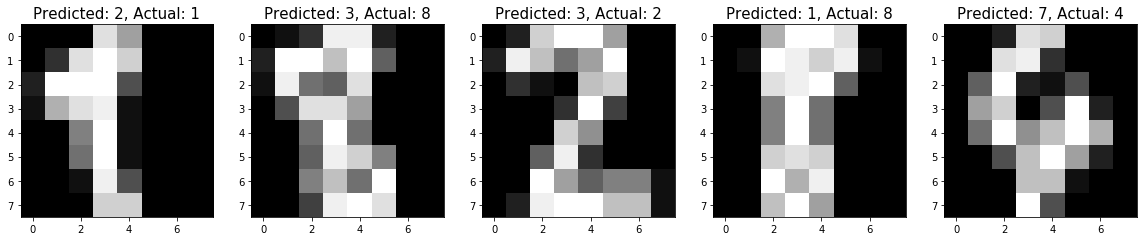

In [9]:

index = 0
misclassifiedIndexes = []
for label, predict in zip(test_labels, y_pred):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1
        
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(test_features[badIndex], (8,8)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(y_pred[badIndex], test_labels[badIndex]), fontsize = 15)

## 1.2 Implement your own Nearest Centroid Classifier (NCC):
The NCC fit method should simply compute the mean values over the attribute values of the examples for each class. Prediction is then done by finding the argmin over the distances from the class centroids for each sample. This classifier should be run on all three variants of data sets, see below

Classification report SKLearn GNB:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        53
           1       0.00      0.00      0.00        53
           2       0.00      0.00      0.00        53
           3       0.00      0.00      0.00        53
           4       0.00      0.00      0.00        56
           5       0.00      0.00      0.00        56
           6       0.00      0.00      0.00        54
           7       0.85      0.83      0.84        54
           8       0.00      0.00      0.00        52
           9       0.11      1.00      0.20        55

    accuracy                           0.19       539
   macro avg       0.10      0.18      0.10       539
weighted avg       0.10      0.19      0.11       539


Confusion matrix SKLearn GNB:
[[ 0  0  0  0  0  0  0  0  0 53]
 [ 0  0  0  0  0  0  0  3  0 50]
 [ 0  0  0  0  0  0  0  0  0 53]
 [ 0  0  0  0  0  0  0  3  0 50]
 [ 0  0  0  0  0  0  0  1  0 55]
 [ 0  0  0

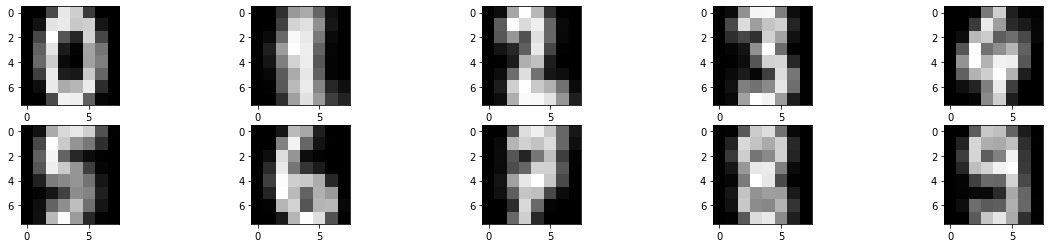

In [60]:
# Dict with class as key, value list of one image (sum of images) and counter
# CLASSIFIER

from numpy import linalg as la

NCC = {}

# loop through all training data 
for idx in range(len(train_features)):
    # Add images to the dict and a counter
    X = train_features[idx]
    y = train_labels[idx]
    if y in NCC:
        NCC[y][0] += X
        NCC[y][1] += 1
    else:
        NCC[y] = [X]
        NCC[y].append(1)
    
    
# Divide each pixel in image with the counter
classifier = {}
for y in NCC.keys():
    classifier[y] = NCC[y][0] / NCC[y][1]


# Plot the classifiers (averages for each class)
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(classifier.keys()):
    plt.subplot(2, 5, plotIndex + 1)
    plt.imshow(np.reshape(classifier[badIndex], (8,8)), cmap=plt.cm.gray)
    #plt.title('Predicted: {}, Actual: {}'.format(y_pred[badIndex], test_labels[badIndex]), fontsize = 15)
    #if plotIndex == 4:
     #   break
    
# PREDICTION
# Check which class with smalles distance (smallest MSE)
y_pred = -1 * np.ones(len(test_labels))
for idx in range(len(test_features)):
    # Add images to the dict and a counter
    X = test_features[idx]
    
    min_dist = 15**32 + 1 # since max dist is sqrt(15^64) = 15^32
    
    for y in classifier.keys():
        #if y == 7 or y == 9:
            #continue
        
        d = la.norm(classifier[y] - X)
        #if y == 0 or y == 5:
            #print(d)
        if d < min_dist:
            min_dist = d
            y_pred[idx] = y
            
            
print("Classification report SKLearn GNB:\n%s\n"
    % (metrics.classification_report(test_labels, y_pred)))
print("Confusion matrix SKLearn GNB:\n%s" % metrics.confusion_matrix(test_labels, y_pred))


    

### 1.3 Implement a Naive Bayesian Classifier (NBC) 
based on discrete (statistical) values (i.e., counts of examples falling into the different classes and attribute value groups) both for the priors and for the conditional probabilities. Run this on the two SciKitLearn digits data sets. It should also work with the (non-normalised) MNIST_Light set, but it will probably take a (very long) while and not give anything interesting really..

In [ ]:
# CLASSIFIER
# P(C)
# Calculate P(C) for each class [0,...,9]

#P(x_i|C)
# For each pixel and class, how probable is the pixel values [0,...,15]
    # Use this to later calculate P(x_i|C)=number of times pixel, i, has color value x_i AND belonged to class C
    # divided with the number of data in our set that belong to class C. 
    # Dict{class: {pos: [counter for each color value, length = 16]}}
    
# divide each value in list with sum of list 


# PREDICTION

# probability_list with the probabilities for each class
# Probability = P(C|X)
# For each class: 
    # Probability[i] = P(C)^n
    # For each pixel in image: 
        # Get the probability for this color value of the pixel given the class P(x_i|C) from dict
        # multiply w probability[i] to get total probability

# Choose class with largest probability, we dont need to normalize

### 1.4 Implement your own Gaussian Naive Bayesian Classifier (GNB) 
(assume priors for the classes based on counts and Gaussian distributions for the conditional probabilities) and make sure it works for all three data sets. You will most likely encounter problems due to the edge pixels having value 0.0 in practically ALL images in ALL data sets. A workaround is to add an epsilon to the variance. Why is that still working?

In [ ]:
# Calculate mean and std for each class and pixel 

# CLASSIFIER
# For each class 
    # for each pixel
        # save list of all color values
    # calculate mean and std for each pixel 
    

#PREDICTION

# For each class: 
    # Probability[i] = P(C)^n
    # For each pixel in image: 
        # P(x|C)=1/2pi*exp(mean-x/std^2)
        # Calculate the probability x in this class given distribution using mean and std
        # multiply w probability[i] to get total probability